In [480]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

In [481]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [482]:
import pandas as pd

#Read input data
train_data = pd.read_csv('/content/drive/MyDrive/ML/titanic-ml-project/data/processed/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/ML/titanic-ml-project/data/processed/test.csv')


In [483]:
# Define features and target variable
X_train = train_data.drop('Survived', axis=1)
Y_train = train_data['Survived']

X_test = test_data.drop('Survived', axis=1)
Y_test = test_data['Survived']

## Random Forest

In [489]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the Random Forest model with specified parameters
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    max_features=0.5,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)

rf_model.fit(X_train, Y_train)

# Make predictions
Y_pred = rf_model.predict(X_test)

# Compute the classification report
target_names = ['Didnt Survived', 'Survived']
print(classification_report(Y_test, Y_pred, target_names=target_names))


                precision    recall  f1-score   support

Didnt Survived       0.92      0.98      0.95       266
      Survived       0.97      0.86      0.91       152

      accuracy                           0.94       418
     macro avg       0.95      0.92      0.93       418
  weighted avg       0.94      0.94      0.94       418



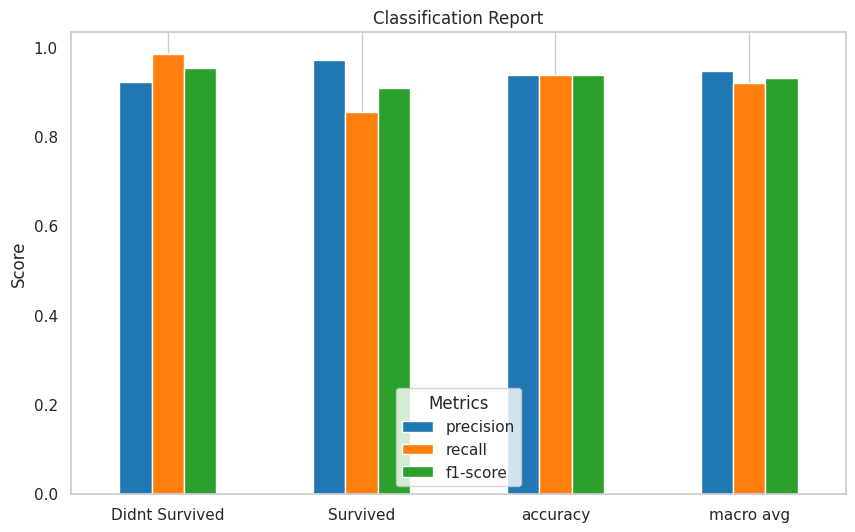

In [490]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(Y_test, Y_pred, target_names=target_names, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the classification report
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], ax=plt.gca())
plt.title('Classification Report')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.show()


A ROC-AUC score of 1.0 indicates perfect discrimination between the classes.<br>
A score of 0.5 indicates no discrimination (equivalent to random guessing).<br>
Scores below 0.5 suggest that the model is performing worse than random guessing.

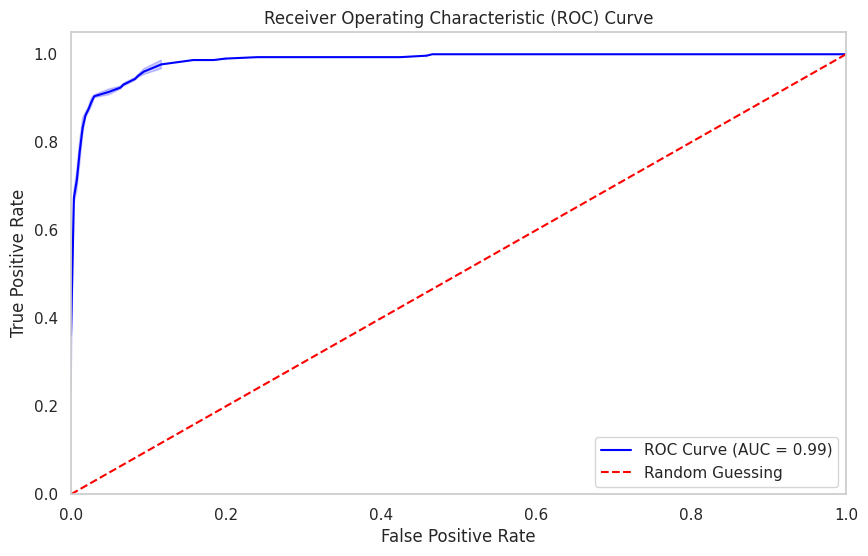

In [491]:
# Get predicted probabilities for the positive class
Y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

# Set the style of Seaborn
sns.set(style="whitegrid")

# Plot ROC curve using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=fpr, y=tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
sns.lineplot(x=[0, 1], y=[0, 1], color='red', linestyle='--', label='Random Guessing')  # Diagonal line for random guessing

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

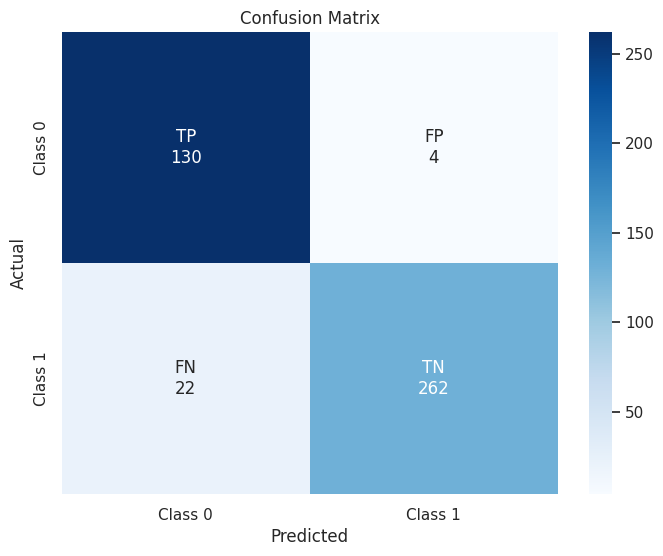

In [492]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Create a new matrix for annotations
annot_matrix = [
    [f'TP\n{conf_matrix[1, 1]}', f'FP\n{conf_matrix[0, 1]}'],
    [f'FN\n{conf_matrix[1, 0]}', f'TN\n{conf_matrix[0, 0]}']
]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=annot_matrix, fmt='', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

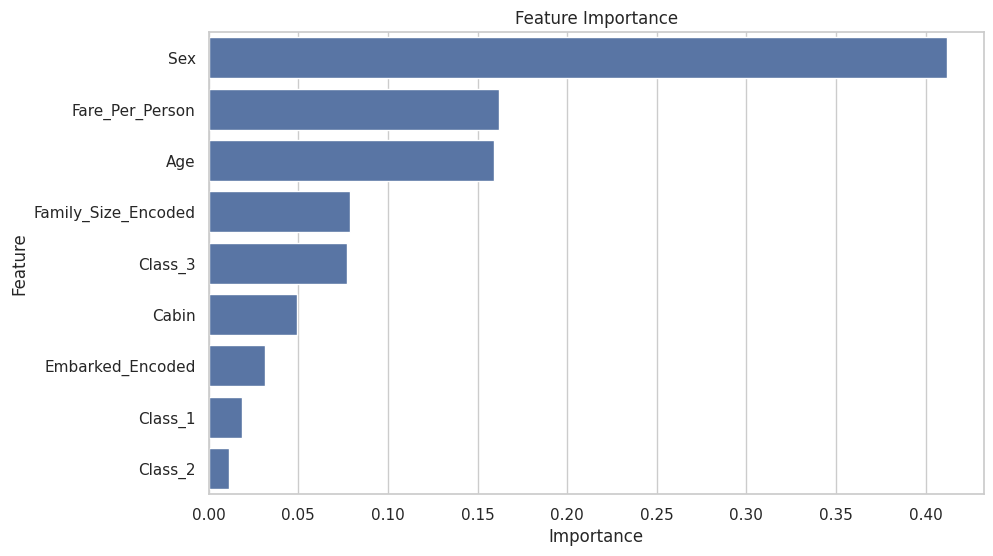

In [493]:
import pandas as pd

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


## DecisionTreeClassifier

In [484]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier with optimized parameters
dt = DecisionTreeClassifier(max_depth=18, max_features='sqrt', min_samples_leaf=0.01, min_samples_split=0.061, random_state=42)

# Train the model
dt.fit(X_train, Y_train)

# Make predictions on the test set
Y_dt_opt_pred = dt.predict(X_test)

target_names = ['Didnt Survived', 'Survived']
print(classification_report(Y_test, Y_dt_opt_pred, target_names=target_names))

                precision    recall  f1-score   support

Didnt Survived       0.89      1.00      0.94       266
      Survived       0.99      0.79      0.88       152

      accuracy                           0.92       418
     macro avg       0.94      0.89      0.91       418
  weighted avg       0.93      0.92      0.92       418



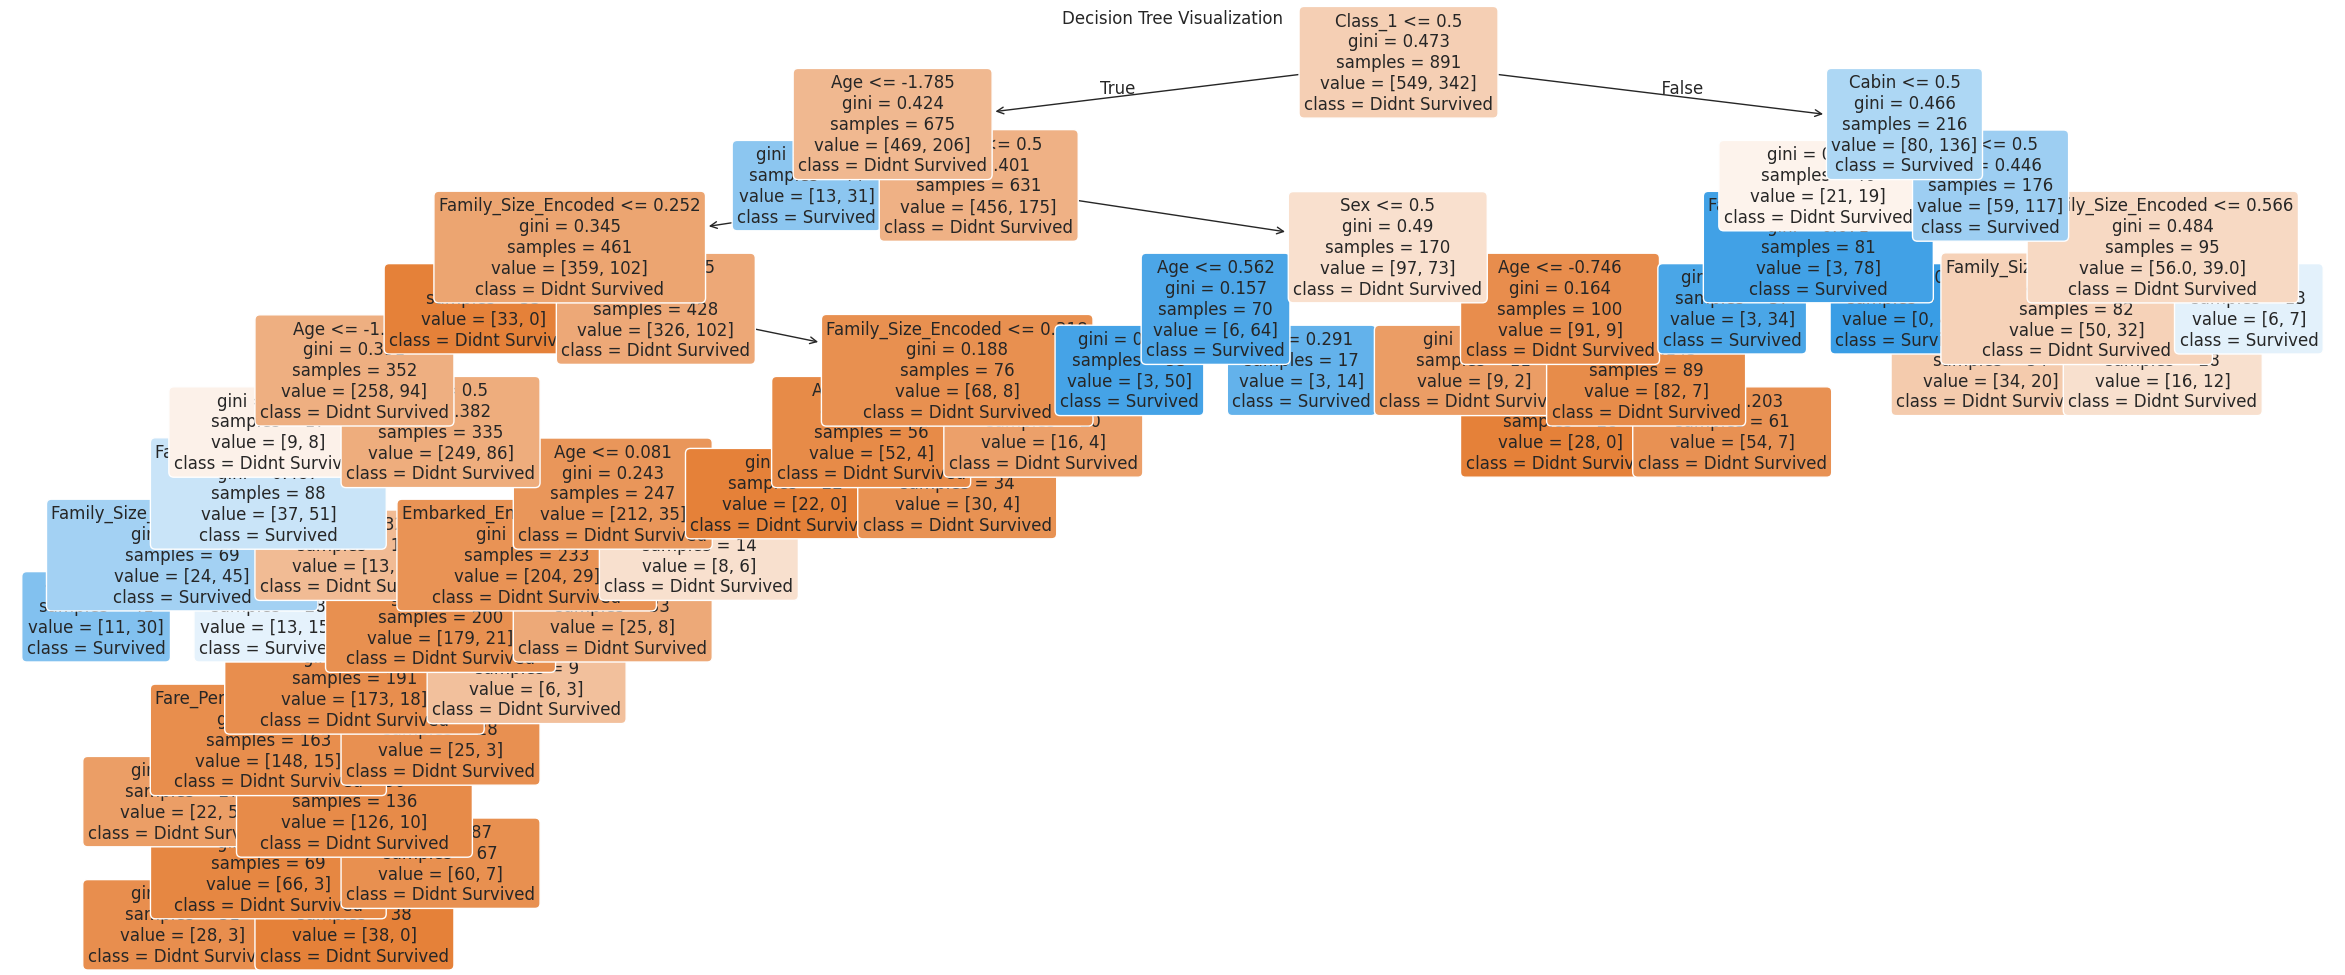

In [485]:
plt.figure(figsize=(30, 12))
plot_tree(dt,
          feature_names=X_train.columns,
          class_names=target_names,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title('Decision Tree Visualization')
plt.show()


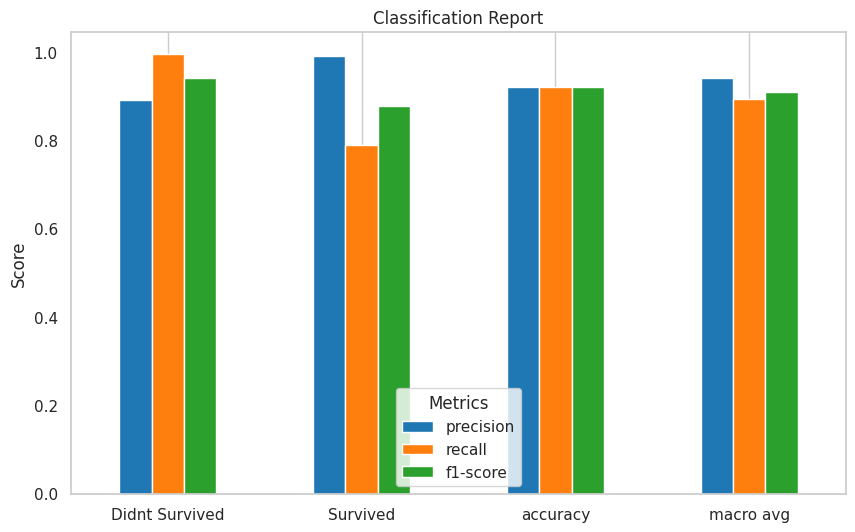

In [486]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(Y_test, Y_dt_opt_pred, target_names=target_names, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the classification report
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], ax=plt.gca())
plt.title('Classification Report')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.show()


A ROC-AUC score of 1.0 indicates perfect discrimination between the classes.<br>
A score of 0.5 indicates no discrimination (equivalent to random guessing).<br>
Scores below 0.5 suggest that the model is performing worse than random guessing.

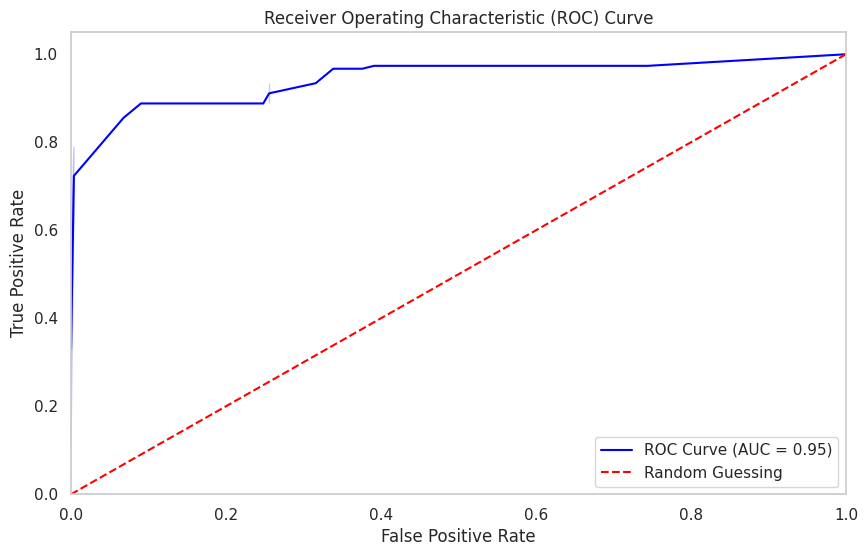

In [487]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Get predicted probabilities for the positive class
Y_dt_opt_pred_proba = dt.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_dt_opt_pred_proba)
roc_auc = auc(fpr, tpr)

# Set the style of Seaborn
sns.set(style="whitegrid")

# Plot ROC curve using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=fpr, y=tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
sns.lineplot(x=[0, 1], y=[0, 1], color='red', linestyle='--', label='Random Guessing')  # Diagonal line for random guessing

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

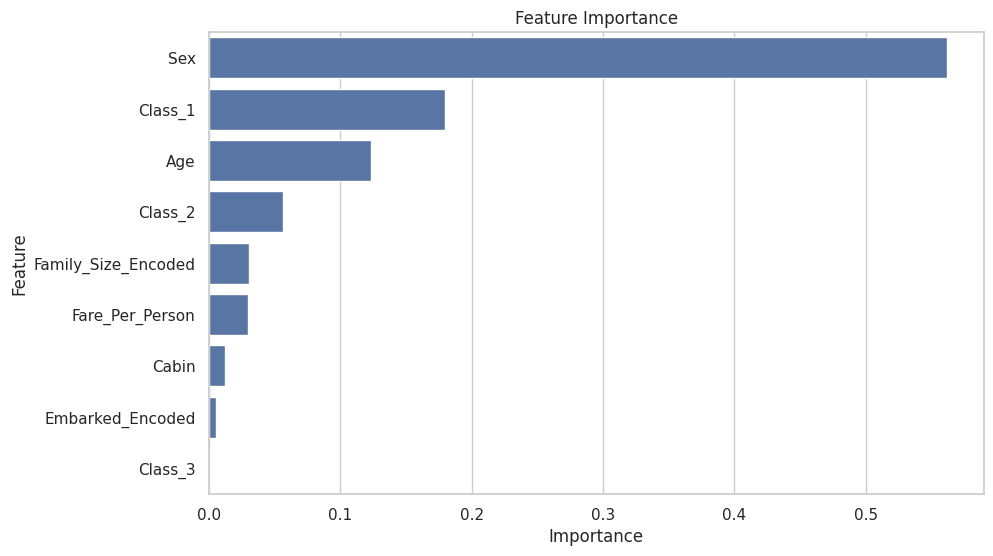

In [488]:
import seaborn as sns

# Get feature importances
importances = dt.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


## HistGradientBoostingClassifier

In [530]:
from sklearn.ensemble import HistGradientBoostingClassifier
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# Initialize and fit the model with the best parameters
model = HistGradientBoostingClassifier(
    min_samples_leaf=7,
    max_iter=558,
    max_depth=4,
    max_bins=38,
    learning_rate=0.446,
    early_stopping=True
)
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Compute the classification report
target_names = ['Didnt Survived', 'Survived']
print(classification_report(Y_test, Y_pred, target_names=target_names))

                precision    recall  f1-score   support

Didnt Survived       0.85      0.95      0.90        93
      Survived       0.95      0.86      0.90       107

      accuracy                           0.90       200
     macro avg       0.90      0.90      0.90       200
  weighted avg       0.90      0.90      0.90       200



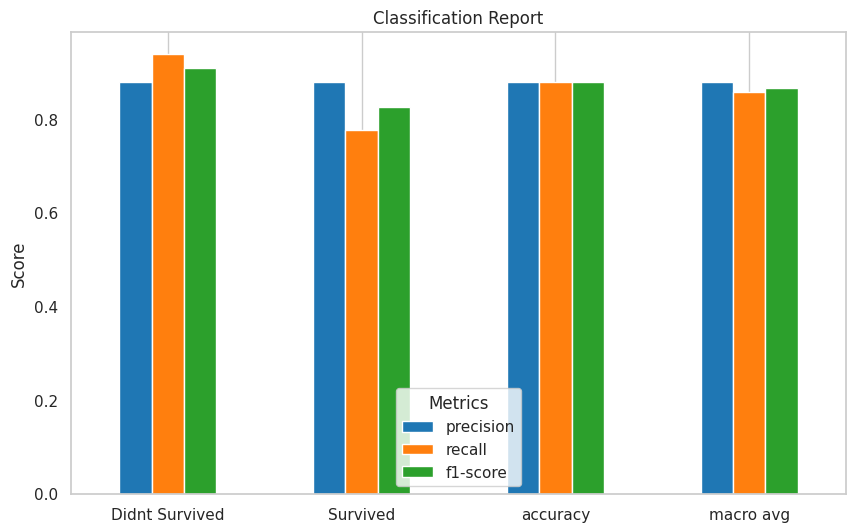

In [495]:
from sklearn.metrics import classification_report
import numpy as np

# Generate the classification report
report = classification_report(Y_test, Y_pred, target_names=target_names, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the classification report
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], ax=plt.gca())
plt.title('Classification Report')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.show()


A ROC-AUC score of 1.0 indicates perfect discrimination between the classes.<br>
A score of 0.5 indicates no discrimination (equivalent to random guessing).<br>
Scores below 0.5 suggest that the model is performing worse than random guessing.

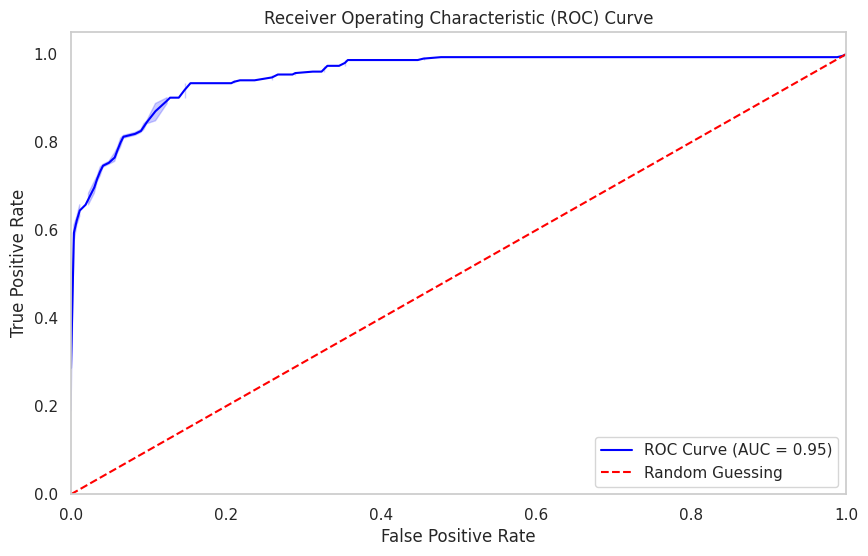

In [496]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Get predicted probabilities for the positive class
Y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

# Set the style of Seaborn
sns.set(style="whitegrid")

# Plot ROC curve using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=fpr, y=tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
sns.lineplot(x=[0, 1], y=[0, 1], color='red', linestyle='--', label='Random Guessing')  # Diagonal line for random guessing

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


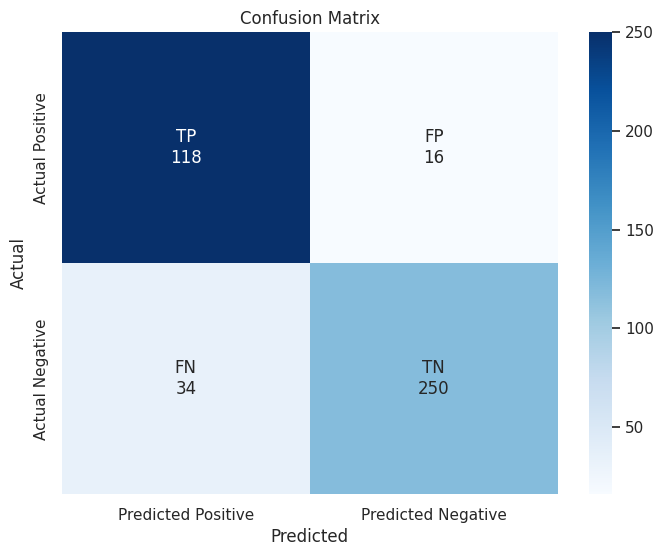

In [497]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Create a new matrix for annotations
annot_matrix = [
    [f'TP\n{conf_matrix[1, 1]}', f'FP\n{conf_matrix[0, 1]}'],
    [f'FN\n{conf_matrix[1, 0]}', f'TN\n{conf_matrix[0, 0]}']
]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=annot_matrix, fmt='', cmap='Blues',
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


## XGBoost

In [538]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the XGBoost model with the specified hyperparameters
model = xgb.XGBClassifier(
    subsample=0.75,
    reg_lambda=0.12,
    reg_alpha=0.44,
    n_estimators=91,
    max_depth=6,
    learning_rate=0.16,
    gamma=0.2,
    colsample_bytree=0.9,
    eval_metric='mlogloss'  # Change this based on your task (e.g., 'logloss' for binary classification)
)

# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate and print the classification report
report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88        93
           1       0.94      0.84      0.89       107

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



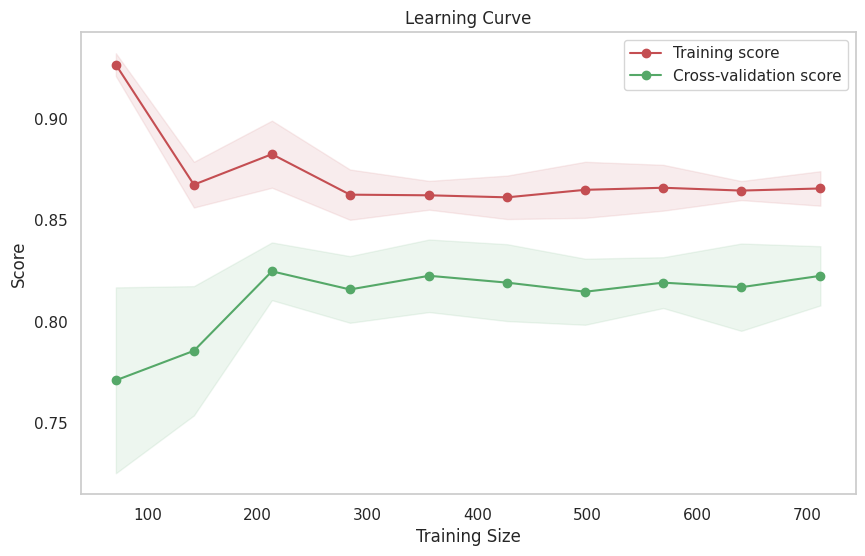

In [499]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation for training and test scores
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


A ROC-AUC score of 1.0 indicates perfect discrimination between the classes.<br>
A score of 0.5 indicates no discrimination (equivalent to random guessing).<br>
Scores below 0.5 suggest that the model is performing worse than random guessing.

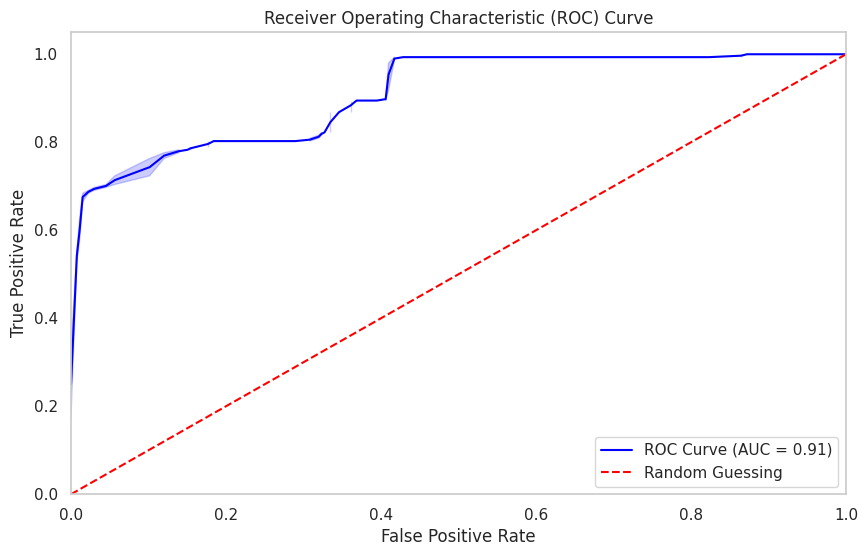

In [500]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Get predicted probabilities for the positive class
Y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

# Set the style of Seaborn
sns.set(style="whitegrid")

# Plot ROC curve using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=fpr, y=tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
sns.lineplot(x=[0, 1], y=[0, 1], color='red', linestyle='--', label='Random Guessing')  # Diagonal line for random guessing

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

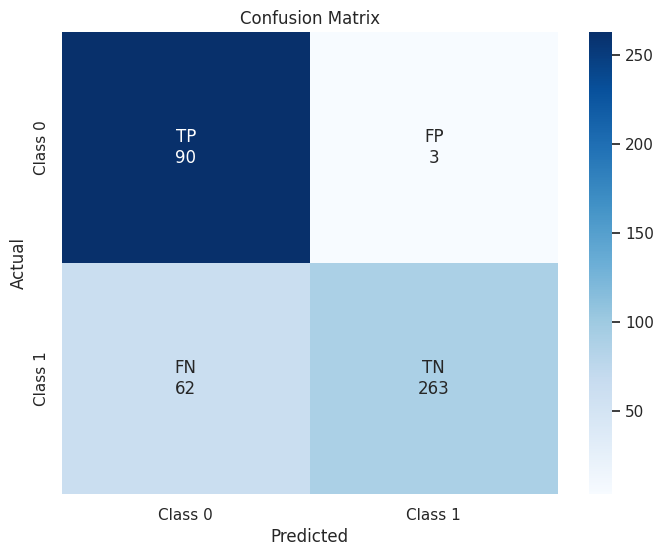

In [501]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Create a new matrix for annotations
annot_matrix = [
    [f'TP\n{cm[1, 1]}', f'FP\n{cm[0, 1]}'],
    [f'FN\n{cm[1, 0]}', f'TN\n{cm[0, 0]}']
]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=annot_matrix, fmt='', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


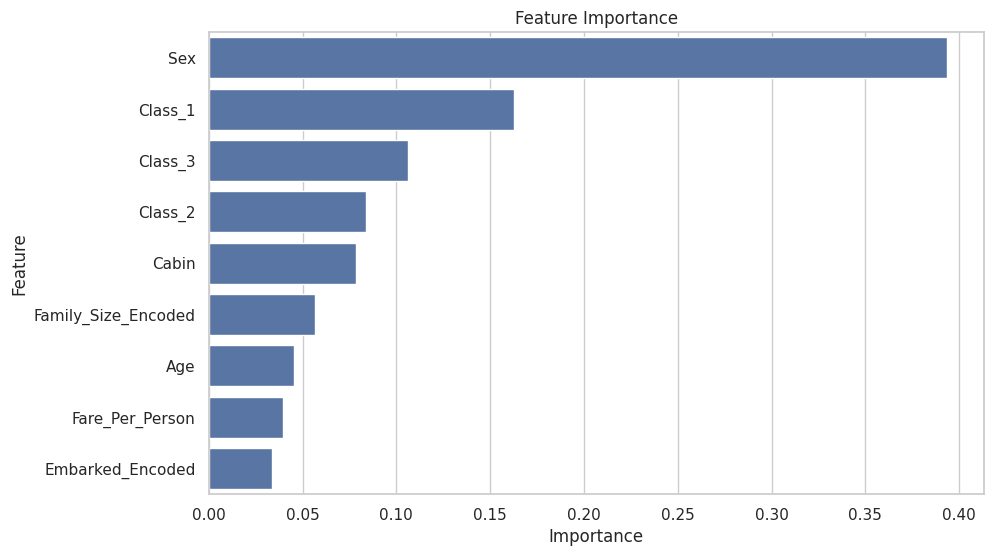

In [502]:
import seaborn as sns

# Get feature importance
importance = model.feature_importances_

feature_names = X_train.columns  # Assuming X_train is a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


## Tunning

#### RandomForestClassifier

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_estimators': (100, 500),  # continuous range
    'max_depth': (None, 20),  # continuous range
    'min_samples_split': (2, 10),  # continuous range
    'min_samples_leaf': (1, 4),  # continuous range
    'max_features': ['sqrt', 'log2', 0.5, 0.75, 1.0]  # categorical
}

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    cv=5,
    n_iter=50,  # increase the number of iterations for better results
    random_state=42
)
random_search.fit(X_train, Y_train)

# Print the best parameters and score from RandomizedSearchCV
print("Best parameters from RandomizedSearchCV: ", {k: round(v, 3) if isinstance(v, (int, float)) else v for k, v in random_search.best_params_.items()})
print("Best score from RandomizedSearchCV: ", random_search.best_score_)

# Train the model with the best parameters
best_model = random_search.best_estimator_
best_model.fit(X_train, Y_train)

# Make predictions
Y_pred = best_model.predict(X_test)

# Compute the classification report
target_names = ['Didnt Survived', 'Survived']
print(classification_report(Y_test, Y_pred, target_names=target_names))


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the Random Forest model with specified parameters
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    max_features=0.5,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)

rf_model.fit(X_train, Y_train)

# Make predictions
Y_pred = rf_model.predict(X_test)

# Compute the classification report
target_names = ['Didnt Survived', 'Survived']
print(classification_report(Y_test, Y_pred, target_names=target_names))


#### DecisionTreeClassifier Tunning

In [503]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from scipy.stats import randint, uniform

# Assuming X_train, X_test, Y_train, Y_test are already loaded and split

# Define the parameter distribution for hyperparameter tuning with RandomizedSearchCV
param_dist = {
    'max_depth': randint(1, 21),  # Randomly sample depths from 1 to 20
    'min_samples_split': uniform(0.01, 0.5),  # Uniform distribution between 0.01 and 0.5
    'min_samples_leaf': uniform(0.01, 0.5),  # Uniform distribution between 0.01 and 0.5
    'max_features': ['auto', 'sqrt', 'log2']  # Example values for max_features
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Use RandomizedSearchCV for hyperparameter tuning with cross-validation
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, Y_train)

# Best parameters
best_params = random_search.best_params_
print("Best parameters (RandomizedSearchCV):")
for param, value in best_params.items():
    if param in ['min_samples_split', 'min_samples_leaf']:
        print(f"{param}: {round(value, 3)}")
    else:
        print(f"{param}: {value}")

# Define a grid of hyperparameters for GridSearchCV around the best parameters
param_grid = {
    'max_depth': [best_params['max_depth']-2, best_params['max_depth']-1, best_params['max_depth'], best_params['max_depth']+1, best_params['max_depth']+2],
    'min_samples_split': [max(0.01, best_params['min_samples_split']-0.05), round(best_params['min_samples_split'], 3), min(0.5, best_params['min_samples_split']+0.05)],
    'min_samples_leaf': [max(0.01, best_params['min_samples_leaf']-0.05), round(best_params['min_samples_leaf'], 3), min(0.5, best_params['min_samples_leaf']+0.05)],
    'max_features': [best_params['max_features']]
}

# Use GridSearchCV for a more exhaustive search in the promising region
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Best parameters
best_params_grid = grid_search.best_params_
print("\nBest parameters (GridSearchCV):")
for param, value in best_params_grid.items():
    if param in ['min_samples_split', 'min_samples_leaf']:
        print(f"{param}: {round(value, 3)}")
    else:
        print(f"{param}: {value}")

# Make predictions on the test set using the best estimator
Y_dt_opt_pred = grid_search.best_estimator_.predict(X_test)

# Define target names for the classification report
target_names = ['Did not Survive', 'Survived']

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_dt_opt_pred, target_names=target_names))

# Evaluate the model's accuracy
accuracy = grid_search.best_estimator_.score(X_test, Y_test)
print("\nTest accuracy:", accuracy)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
170 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
170 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

Best parameters (RandomizedSearchCV):
max_depth: 20
max_features: sqrt
min_samples_leaf: 0.015
min_samples_split: 0.061

Best parameters (GridSearchCV):
max_depth: 18
max_features: sqrt
min_samples_leaf: 0.01
min_samples_split: 0.111

Classification Report:
                 precision    recall  f1-score   support

Did not Survive       0.86      0.98      0.92       266
       Survived       0.95      0.72      0.82       152

       accuracy                           0.89       418
      macro avg       0.90      0.85      0.87       418
   weighted avg       0.89      0.89      0.88       418


Test accuracy: 0.8851674641148325


In [504]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier with optimized parameters
dt = DecisionTreeClassifier(max_depth=18, max_features='sqrt', min_samples_leaf=0.01, min_samples_split=0.061, random_state=42)

# Train the model
dt.fit(X_train, Y_train)

# Make predictions on the test set
Y_dt_opt_pred = dt.predict(X_test)

target_names = ['Didnt Survived', 'Survived']
print(classification_report(Y_test, Y_dt_opt_pred, target_names=target_names))

                precision    recall  f1-score   support

Didnt Survived       0.89      1.00      0.94       266
      Survived       0.99      0.79      0.88       152

      accuracy                           0.92       418
     macro avg       0.94      0.89      0.91       418
  weighted avg       0.93      0.92      0.92       418



#### HistGradientBoostingClassifier Tunning

In [508]:
import numpy as np
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from scipy.stats import uniform, randint

# Create a synthetic dataset
X, Y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the hyperparameter search space using continuous distributions
param_dist = {
    'learning_rate': uniform(0.01, 1),  # Continuous values between 0.01 and 1
    'max_iter': randint(100, 1001),      # Integer values between 100 and 1000
    'max_depth': randint(3, 8),          # Integer values between 3 and 7
    'min_samples_leaf': randint(1, 11),  # Integer values between 1 and 10
    'max_bins': randint(16, 65),         # Integer values between 16 and 64
    'early_stopping': [True, False]
}

# Define the model and the cross-validation strategy
model = HistGradientBoostingClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(model, param_dist, cv=cv, n_iter=30, random_state=42)
random_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best parameters (before rounding):", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Round the best parameters to 3 decimal places
best_params_rounded = {k: round(v, 3) if isinstance(v, float) else v for k, v in random_search.best_params_.items()}
print("Best parameters (after rounding):", best_params_rounded)

# Define a smaller parameter grid for RandomizedSearchCV based on the best parameters found
grid_param = {
    'learning_rate': [best_params_rounded['learning_rate'] - 0.01, best_params_rounded['learning_rate'], best_params_rounded['learning_rate'] + 0.01],
    'max_iter': [best_params_rounded['max_iter'] - 100, best_params_rounded['max_iter'], best_params_rounded['max_iter'] + 100],
    'max_depth': [best_params_rounded['max_depth'] - 1, best_params_rounded['max_depth'], best_params_rounded['max_depth'] + 1],
    'min_samples_leaf': [best_params_rounded['min_samples_leaf'] - 1, best_params_rounded['min_samples_leaf'], best_params_rounded['min_samples_leaf'] + 1],
    'max_bins': [best_params_rounded['max_bins'] - 8, best_params_rounded['max_bins'], best_params_rounded['max_bins'] + 8],
    'early_stopping': [True, False]
}

# Perform randomized search again instead of grid search for efficiency
random_search_final = RandomizedSearchCV(model, grid_param, cv=cv, n_iter=30, n_jobs=-1, random_state=42)
random_search_final.fit(X_train, Y_train)

# Print the best parameters and the best score from the final search
print("Best parameters from final RandomizedSearchCV:", random_search_final.best_params_)
print("Best score from final RandomizedSearchCV:", random_search_final.best_score_)

# Evaluate the best model on the test set
best_model = random_search_final.best_estimator_
test_score = best_model.score(X_test, Y_test)
print("Test set score:", test_score)


Best parameters (before rounding): {'early_stopping': True, 'learning_rate': np.float64(0.45583275285359115), 'max_bins': 38, 'max_depth': 5, 'max_iter': 558, 'min_samples_leaf': 8}
Best score: 0.9099999999999999
Best parameters (after rounding): {'early_stopping': True, 'learning_rate': np.float64(0.456), 'max_bins': 38, 'max_depth': 5, 'max_iter': 558, 'min_samples_leaf': 8}
Best parameters from final RandomizedSearchCV: {'min_samples_leaf': 7, 'max_iter': 558, 'max_depth': 4, 'max_bins': 38, 'learning_rate': np.float64(0.446), 'early_stopping': True}
Best score from final RandomizedSearchCV: 0.9125
Test set score: 0.895


In [518]:
from sklearn.ensemble import HistGradientBoostingClassifier
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# Initialize and fit the model with the best parameters
model = HistGradientBoostingClassifier(
    min_samples_leaf=7,
    max_iter=558,
    max_depth=4,
    max_bins=38,
    learning_rate=0.446,
    early_stopping=True
)
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Compute the classification report
target_names = ['Didnt Survived', 'Survived']
print(classification_report(Y_test, Y_pred, target_names=target_names))

                precision    recall  f1-score   support

Didnt Survived       0.88      0.95      0.91        93
      Survived       0.95      0.89      0.92       107

      accuracy                           0.92       200
     macro avg       0.92      0.92      0.91       200
  weighted avg       0.92      0.92      0.92       200



#### XGBoost Tunning

In [536]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import uniform, randint
import numpy as np

def xgboost_hyperparameter_tuning(X_train, Y_train, X_test, Y_test):
    # Define the hyperparameter search space using continuous distributions
    param_distributions = {
        'max_depth': randint(3, 10),
        'learning_rate': uniform(0.01, 0.99),
        'n_estimators': randint(50, 501),
        'gamma': uniform(0, 1),
        'subsample': uniform(0.1, 0.9),
        'colsample_bytree': uniform(0.1, 0.9),
        'reg_alpha': uniform(0, 1),
        'reg_lambda': uniform(0, 1)
    }

    # Define the model and the cross-validation strategy
    model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform randomized search with cross-validation
    random_search = RandomizedSearchCV(
        model,
        param_distributions,
        cv=cv,
        n_iter=50,
        random_state=42,
        scoring='f1_macro',
        n_jobs=-1,
        verbose=1
    )

    random_search.fit(X_train, Y_train)

    # Round the best parameters from RandomizedSearchCV
    best_params_random = {k: round(v, 2) if isinstance(v, float) else v for k, v in random_search.best_params_.items()}
    print("Best parameters from RandomizedSearchCV (rounded):", best_params_random)
    print("Best score from RandomizedSearchCV:", random_search.best_score_)

    # Define a narrower grid around the best parameters found
    param_grid = {
        'max_depth': [best_params_random['max_depth'] - 1, best_params_random['max_depth'], best_params_random['max_depth'] + 1],
        'learning_rate': [round(best_params_random['learning_rate'] - 0.05, 3),
                          round(best_params_random['learning_rate'], 3),
                          round(best_params_random['learning_rate'] + 0.05, 3)],
        'n_estimators': [best_params_random['n_estimators'] - 50, best_params_random['n_estimators'], best_params_random['n_estimators'] + 50],
        'gamma': [round(best_params_random['gamma'] - 0.1, 3),
                  round(best_params_random['gamma'], 3),
                  round(best_params_random['gamma'] + 0.1, 3)],
        'subsample': [round(best_params_random['subsample'], 3)],
        'colsample_bytree': [round(best_params_random['colsample_bytree'], 3)],
        'reg_alpha': [round(best_params_random['reg_alpha'], 3)],
        'reg_lambda': [round(best_params_random['reg_lambda'], 3)]
    }

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(
        model,
        param_grid,
        cv=cv,
        scoring='f1_macro',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, Y_train)

    # Round the best parameters from GridSearchCV
    best_params_grid = {k: round(v, 2) if isinstance(v, float) else v for k, v in grid_search.best_params_.items()}
    print("Best parameters from GridSearchCV (rounded):", best_params_grid)
    print("Best score from GridSearchCV:", grid_search.best_score_)

    # Evaluate the best model on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print("Test set accuracy:", accuracy_score(Y_test, y_pred))
    print("Test set classification report:")
    print(classification_report(Y_test, y_pred))

# Assuming X_train, X_test, Y_train, Y_test are already loaded and split
xgboost_hyperparameter_tuning(X_train, Y_train, X_test, Y_test)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters from RandomizedSearchCV (rounded): {'colsample_bytree': np.float64(0.45), 'gamma': np.float64(0.94), 'learning_rate': np.float64(0.15), 'max_depth': 6, 'n_estimators': 490, 'reg_alpha': np.float64(0.11), 'reg_lambda': np.float64(0.92), 'subsample': np.float64(0.89)}
Best score from RandomizedSearchCV: 0.8998633808127616
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters from GridSearchCV (rounded): {'colsample_bytree': np.float64(0.45), 'gamma': np.float64(0.84), 'learning_rate': np.float64(0.15), 'max_depth': 7, 'n_estimators': 490, 'reg_alpha': np.float64(0.11), 'reg_lambda': np.float64(0.92), 'subsample': np.float64(0.89)}
Best score from GridSearchCV: 0.9110464655282133
Test set accuracy: 0.905
Test set classification report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90        93
           1       0.96      0.86      0.91   

In [543]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the XGBoost model with the specified hyperparameters
model = xgb.XGBClassifier(
    subsample=0.89,
    reg_lambda=0.92,
    reg_alpha=0.11,
    n_estimators=490,
    max_depth=7,
    learning_rate=0.15,
    gamma=0.84,
    colsample_bytree=0.45,
    eval_metric='mlogloss'  # Change this based on your task (e.g., 'logloss' for binary classification)
)

# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate and print the classification report
report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        93
           1       0.93      0.85      0.89       107

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200

